# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [2]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 73.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 78.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 78.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 82.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 73.0 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 75.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 71.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 75.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 77.6 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.6 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=3369a38daf0cd59cb665f048f93b70b3921515697250403e1ad818665f9307a4
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [5]:
!pip install --upgrade jupyter

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: jupyter in /root/.local/lib/python3.7/site-packages (1.0.0)
     |████████████████████████████████| 386 kB 1.5 MB/s eta 0:00:01
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [6]:
!pip install --upgrade ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 8.0 MB/s eta 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0


In [7]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler


# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Specify the directory to save the MNIST dataset
root = './data'

# Create training set and define training data loader
trainset = datasets.MNIST(root=root, download=True, train=True, transform=transform)

# Split the training set into training and validation sets
validation_split = 0.2
dataset_size = len(trainset)
indices = list(range(dataset_size))
split = int(validation_split * dataset_size)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, sampler=train_sampler)
validloader = torch.utils.data.DataLoader(trainset, batch_size=64, sampler=val_sampler)

# Create test set and define test data loader
testset = datasets.MNIST(root=root, download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [18]:
# Print out the size and shape of datasets
print(f"Size of training set: {len(trainset)}")
print(f"Size of validation set: {len(val_indices)}")
print(f"Size of test set: {len(testset)}")

sample_train_image, sample_train_label = next(iter(trainloader))
print(f"Shape of a training batch: {sample_train_image.shape}")

sample_valid_image, sample_valid_label = next(iter(validloader))
print(f"Shape of a validation batch: {sample_valid_image.shape}")

sample_test_image, sample_test_label = next(iter(testloader))
print(f"Shape of a test batch: {sample_test_image.shape}")

Size of training set: 60000
Size of validation set: 12000
Size of test set: 10000
Shape of a training batch: torch.Size([64, 1, 28, 28])
Shape of a validation batch: torch.Size([64, 1, 28, 28])
Shape of a test batch: torch.Size([64, 1, 28, 28])


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**The chosen transforms, 'ToTensor()' and 'Normalize()', were used to convert the MNIST dataset images into PyTorch tensor format and normalize the pixel values, respectively. These steps are crucial for PyTorch compatibility and to improve training stability by standardizing the input data. If no preprocessing steps were used, it could be due to the dataset already being in the required format or not requiring additional normalization for the specific task.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [13]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


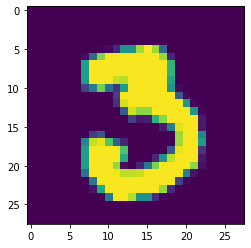

1


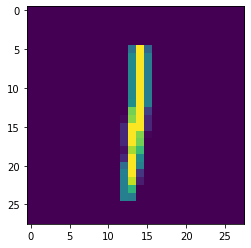

1


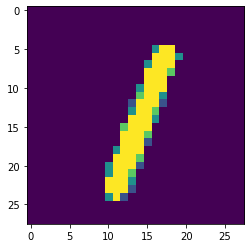

7


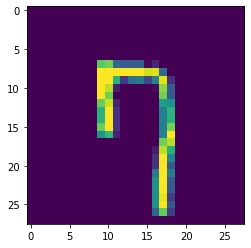

3


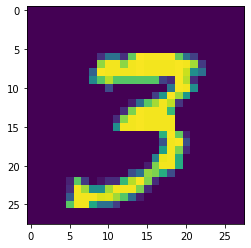

In [14]:
# Explore data
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [15]:
# Define the class for your neural network
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(784, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch 
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = F.log_softmax(self.layer4(x), dim=1)
        return x

In [16]:
# Use GPU if it's available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [17]:
# Instantiate the model
model = Network()

# Choose an optimizer
optimizer = optimizer = optim.Adam(model.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.NLLLoss() # negative log likelihood loss (NLLLoss)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [13]:
epochs = 10

model.to(device)  # Move model to the appropriate device

# Establish a list for our history
train_loss_history = []
val_loss_history = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # Pass to GPU if available
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        # Zero out the gradients of the optimizer
        optimizer.zero_grad()
        
        # Get the outputs of your model and compute your loss
        outputs = model(inputs)
        loss = criterion(outputs, labels) ##
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        train_loss += loss.item()
    print(f'Epoch: {epoch + 1}, training accuracy: {train_correct/len(trainloader):.2f}, training loss: {train_loss/len(trainloader):.5f}')
    train_loss_history.append(train_loss/len(trainloader))
    
    # The validation step
    val_loss = 0
    val_correct = 0
    model.eval()
    
    for i, data in enumerate(validloader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # Pass to GPU if available
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        # Zero out the gradients of the optimizer
        optimizer.zero_grad()
    
        outputs = model(inputs)
        loss = criterion(outputs, labels)
    
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1}, validation accuracy: {val_correct/len(validloader):.2f}, validation loss: {val_loss/len(validloader):.5f}')
    val_loss_history.append(val_loss/len(validloader))
    
    model.train()  # Switch back to training mode for the next epoch

Epoch: 1, training accuracy: 0.87, training loss: 0.41870
Epoch 1, validation accuracy: 0.93, validation loss: 0.21699
Epoch: 2, training accuracy: 0.94, training loss: 0.18613
Epoch 2, validation accuracy: 0.95, validation loss: 0.16033
Epoch: 3, training accuracy: 0.96, training loss: 0.13480
Epoch 3, validation accuracy: 0.94, validation loss: 0.17185
Epoch: 4, training accuracy: 0.96, training loss: 0.10985
Epoch 4, validation accuracy: 0.97, validation loss: 0.10000
Epoch: 5, training accuracy: 0.97, training loss: 0.08825
Epoch 5, validation accuracy: 0.97, validation loss: 0.10201
Epoch: 6, training accuracy: 0.97, training loss: 0.08151
Epoch 6, validation accuracy: 0.97, validation loss: 0.10946
Epoch: 7, training accuracy: 0.98, training loss: 0.06806
Epoch 7, validation accuracy: 0.97, validation loss: 0.10358
Epoch: 8, training accuracy: 0.98, training loss: 0.06108
Epoch 8, validation accuracy: 0.97, validation loss: 0.10418
Epoch: 9, training accuracy: 0.98, training loss

Plot the training loss (and validation loss/accuracy, if recorded).

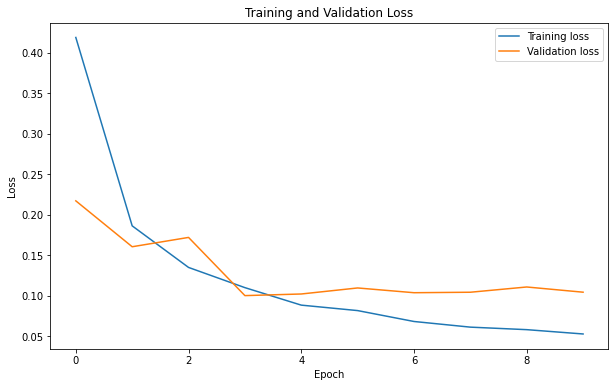

In [14]:
# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(train_loss_history, label="Training loss")
plt.plot(val_loss_history, label="Validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:
# Initialize variables to store test loss and test accuracy
test_loss = 0
test_accuracy = 0

# Disable gradient calculation
with torch.no_grad():
    
    for i, data in enumerate(testloader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # Pass to GPU if available
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        log_ps = model(inputs) #forward pass
        test_loss += criterion(log_ps, labels) # test loss
        
        ps = torch.exp(log_ps) # Calculate the probabilities
        top_p, top_class = ps.topk(1, dim=1) # Get the predicted classes
        
        # Check if the predicted classes match the actual labels
        equals = top_class == labels.view(*top_class.shape)
        
        # Calculate the test accuracy by computing the mean of correct predictions
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))
        
    # Calculate the average test loss and test accuracy over all batches
    total_test_loss = test_loss / len(testloader)
    total_test_accuracy = test_accuracy / len(testloader)

    print("Test Loss: {:.3f}".format(total_test_loss.item()))
    print("Test Accuracy: {:.2f}%".format(total_test_accuracy.item() * 100))
        

Test Loss: 0.098
Test Accuracy: 97.53%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [16]:
# Instantiate the model
model = Network()

# Choose an optimizer
optimizer = optim.SGD(model.parameters(), lr=0.05) #A much bigger learning rate and SGD

# Choose a loss function
criterion = nn.NLLLoss() # negative log likelihood loss (NLLLoss)

In [17]:
epochs = 15 # a higher number of epochs

model.to(device)  # Move model to the appropriate device

# Establish a list for our history
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # Pass to GPU if available
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        # Zero out the gradients of the optimizer
        optimizer.zero_grad()
        
        # Get the outputs of your model and compute your loss
        outputs = model(inputs)
        loss = criterion(outputs, labels) ##
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        train_loss += loss.item()
    print(f'Epoch: {epoch + 1}, training accuracy: {train_correct/len(trainloader):.2f}, training loss: {train_loss/len(trainloader):.5f}')
    train_losses.append(train_loss/len(trainloader))
    
    # The validation step
    val_loss = 0
    val_correct = 0
    model.eval()
    
    for i, data in enumerate(validloader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # Pass to GPU if available
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        # Zero out the gradients of the optimizer
        optimizer.zero_grad()
    
        outputs = model(inputs)
        loss = criterion(outputs, labels)
    
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1}, validation accuracy: {val_correct/len(validloader):.2f}, validation loss: {val_loss/len(validloader):.5f}')
    val_losses.append(val_loss/len(validloader))
    
    model.train()  # Switch back to training mode for the next epoch

Epoch: 1, training accuracy: 0.78, training loss: 0.70253
Epoch 1, validation accuracy: 0.91, validation loss: 0.28798
Epoch: 2, training accuracy: 0.92, training loss: 0.25009
Epoch 2, validation accuracy: 0.94, validation loss: 0.20989
Epoch: 3, training accuracy: 0.95, training loss: 0.17640
Epoch 3, validation accuracy: 0.95, validation loss: 0.16542
Epoch: 4, training accuracy: 0.96, training loss: 0.13876
Epoch 4, validation accuracy: 0.96, validation loss: 0.11912
Epoch: 5, training accuracy: 0.96, training loss: 0.11300
Epoch 5, validation accuracy: 0.97, validation loss: 0.10490
Epoch: 6, training accuracy: 0.97, training loss: 0.09420
Epoch 6, validation accuracy: 0.97, validation loss: 0.10873
Epoch: 7, training accuracy: 0.97, training loss: 0.08156
Epoch 7, validation accuracy: 0.97, validation loss: 0.10125
Epoch: 8, training accuracy: 0.98, training loss: 0.07059
Epoch 8, validation accuracy: 0.97, validation loss: 0.08302
Epoch: 9, training accuracy: 0.98, training loss

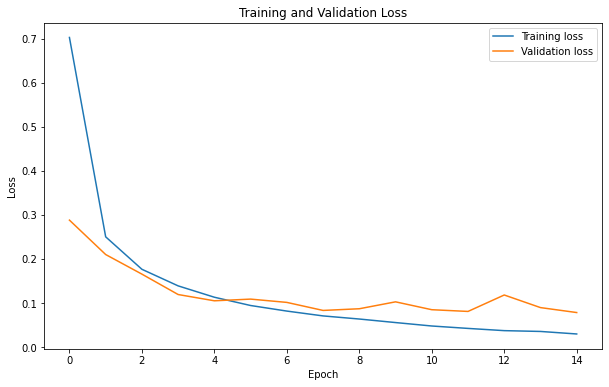

In [18]:
# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [20]:
torch.save(model.to('cpu').state_dict(), 'checkpoint.pth')